In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('HousingData.csv')
df.shape

(506, 14)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


<Axes: xlabel='CRIM', ylabel='MEDV'>

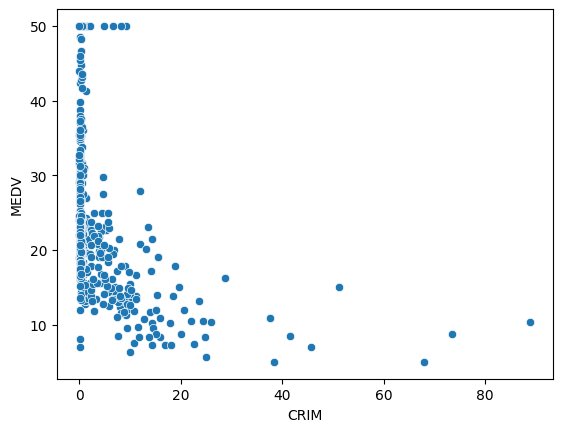

In [5]:
sns.scatterplot(y=df["MEDV"],x=df["CRIM"])

<Axes: xlabel='TAX', ylabel='MEDV'>

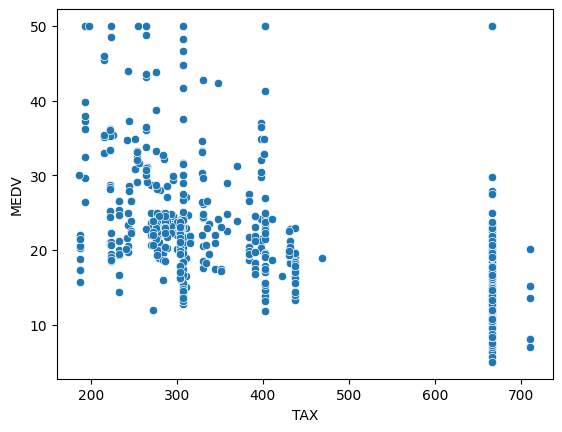

In [6]:
sns.scatterplot(y=df["MEDV"],x=df["TAX"])

<Axes: xlabel='RM', ylabel='MEDV'>

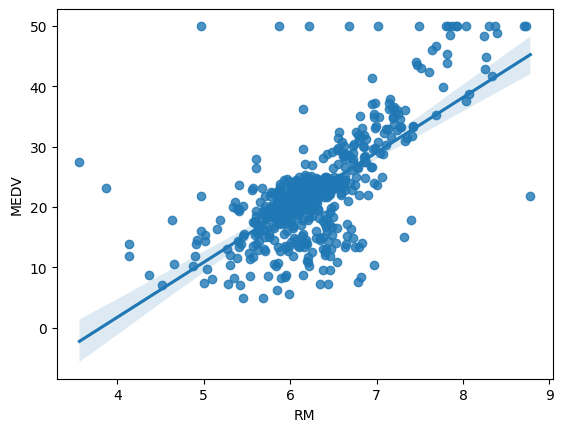

In [7]:
sns.regplot(y=df["MEDV"],x=df["RM"])

<Axes: xlabel='CRIM', ylabel='MEDV'>

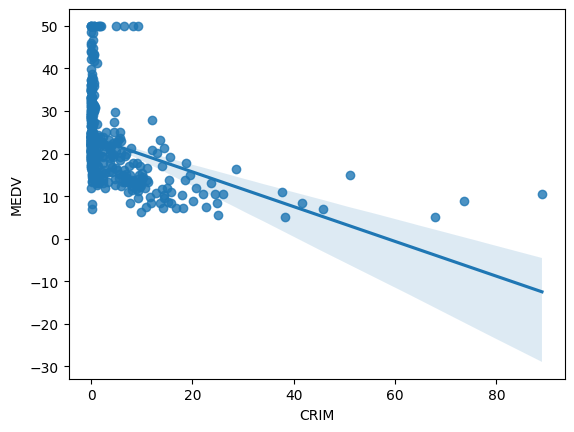

In [8]:
sns.regplot(y=df["MEDV"],x=df["CRIM"])

In [9]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
data=df.fillna(df.mean())

In [11]:
df.isna().sum()
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

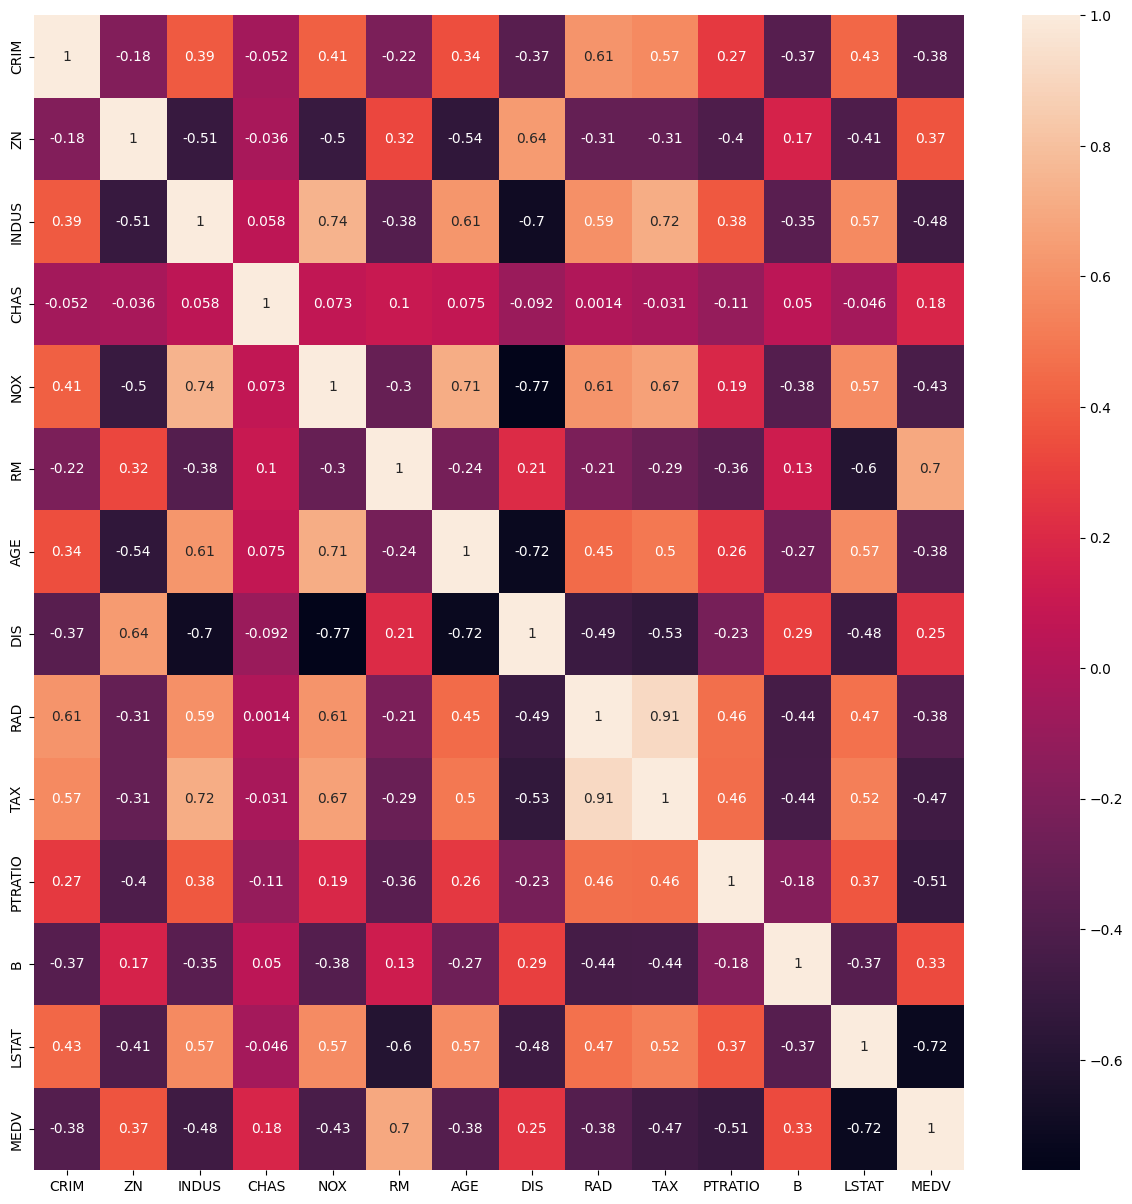

In [12]:
fig=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

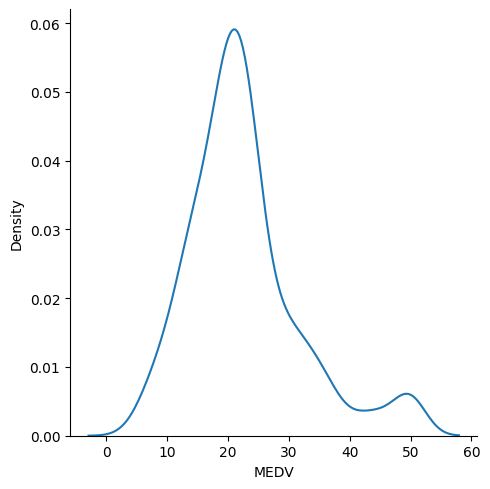

In [13]:
sns.displot(data["MEDV"],kind="kde")

<Axes: xlabel='PTRATIO', ylabel='Count'>

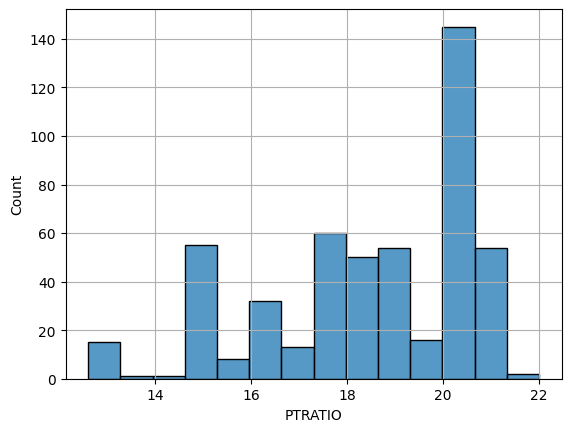

In [14]:
plt.grid()
sns.histplot(data["PTRATIO"])

<Axes: xlabel='B', ylabel='MEDV'>

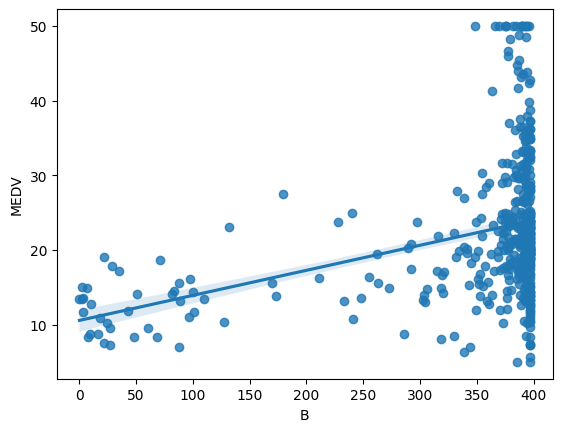

In [15]:
sns.regplot(data=data,x="B",y="MEDV")

<Axes: xlabel='DIS', ylabel='MEDV'>

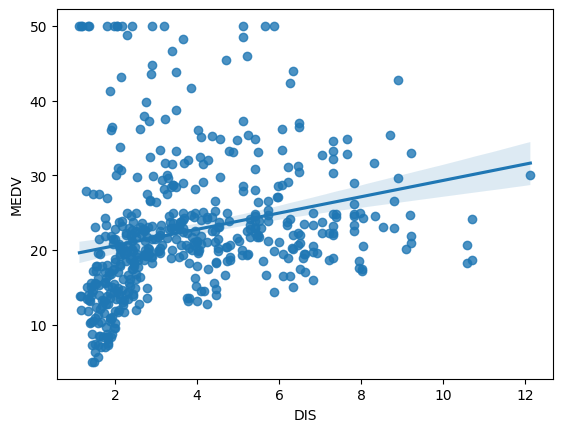

In [16]:
sns.regplot(data=data,x="DIS",y="MEDV")

In [17]:
Price=data["MEDV"]
new_data=data.drop(["MEDV"],axis=1)
# data=data.drop(["MEDV"],axis=1)

In [18]:
type(data)
# type(Price)
new_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [19]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# columns=data.columns
# my_data=pd.DataFrame(scaler.fit_transform(data),columns=columns)
# my_data.head()

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(new_data,Price,test_size=0.1,shuffle=True)

In [21]:
model=LinearRegression()
model.fit(X_train,Y_train)
Yhat=model.predict(X_test)

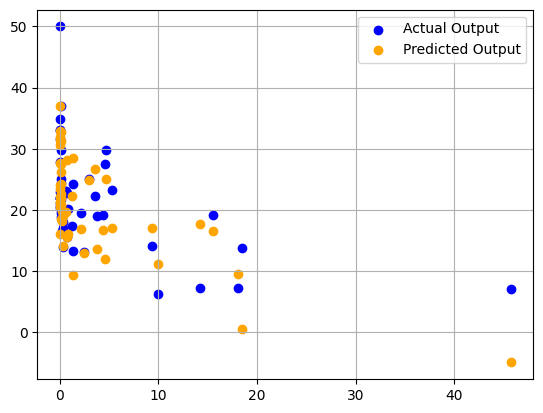

In [22]:
plt.grid()
columns=X_test.columns
plt.scatter(x=X_test["CRIM"],y=Y_test,color="Blue",label="Actual Output")
plt.scatter(X_test["CRIM"],Yhat,color="orange",label="Predicted Output")
plt.legend()


In [23]:
print(model.score(X_train,Y_train))
print(r2_score(Y_test,Yhat))
print(mean_squared_error(Y_test,Yhat))
print(model.coef_)
print(model.intercept_)

0.7448151422360475
0.5459346884181236
28.33236614250268
[-1.19114614e-01  4.46798148e-02  4.24970433e-03  3.10793491e+00
 -1.81108908e+01  4.29211616e+00 -9.44011661e-03 -1.53387631e+00
  2.70834078e-01 -1.12385064e-02 -9.83047039e-01  1.00109790e-02
 -4.62408819e-01]
34.09765178846749


In [24]:
# 